# 1. Imports

In [55]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥ 1.0.1 is required
from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import pandas as pd
import os
import re

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

1.3.1


# 2. Get the data

In [56]:
csv_path_solar = 'datasets/solar.csv'
solar = pd.read_csv(csv_path_solar)
solar

,timestamp,kwh
0,2023-03-11 16:00:10.160454+01,0.5400
1,2023-03-11 17:00:10.217795+01,1.0200
2,2023-03-11 18:00:10.284064+01,1.1700
3,2023-03-11 19:00:10.224836+01,1.1800
4,2023-03-11 20:00:10.201847+01,1.1800
...,...,...
9700,2024-04-19 06:00:10.326636+02,2417.3321
9701,2024-04-19 07:00:10.424826+02,2417.3321
9702,2024-04-19 08:00:10.360449+02,2417.3336
9703,2024-04-19 09:00:10.437154+02,2417.3701


In [57]:
csv_path_weather = 'datasets/weather.csv'
weather = pd.read_csv(csv_path_weather)
weather

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01T09:00:00,NaN,NaN,4.9,NaN,NaN,NaN,...,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01T09:00:00,NaN,NaN,2.1,NaN,NaN,NaN,...,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01T09:00:00,NaN,NaN,3.3,NaN,NaN,NaN,...,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T09:00:00,NaN,NaN,1.6,NaN,NaN,-10.0,...,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T10:00:00,NaN,NaN,3.0,NaN,NaN,NaN,...,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39835,synop_data.6407.2024-04-19 07:00:00+00,POINT (51.200341 2.887306),6407,2024-04-19T07:00:00,NaN,NaN,10.6,NaN,NaN,NaN,...,1,290.0,14.0,NaN,NaN,1013.5,1012.8,NaN,NaN,8.0
39836,synop_data.6434.2024-04-19 08:00:00+00,POINT (50.980293 3.816003),6434,2024-04-19T08:00:00,NaN,NaN,10.0,NaN,NaN,NaN,...,1,276.5,9.8,90.5,NaN,1012.7,1010.7,NaN,NaN,NaN
39837,synop_data.6407.2024-04-19 08:00:00+00,POINT (51.200341 2.887306),6407,2024-04-19T08:00:00,NaN,NaN,10.8,NaN,NaN,NaN,...,1,290.0,15.0,NaN,NaN,1013.2,1012.6,NaN,NaN,8.0
39838,synop_data.6414.2024-04-19 08:00:00+00,POINT (50.90398 3.121692),6414,2024-04-19T08:00:00,NaN,NaN,9.9,NaN,NaN,NaN,...,1,273.3,12.4,89.7,NaN,1013.6,1010.4,NaN,NaN,NaN


In [58]:
sunset = pd.read_excel('datasets/sunrise-sunset.xlsx')
sunset

,datum,Opkomst,Op ware middag,Ondergang
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00
...,...,...,...,...
726,2024-12-27,08:45:00,12:44:00,16:43:00
727,2024-12-28,08:45:00,12:44:00,16:44:00
728,2024-12-29,08:45:00,12:45:00,16:45:00
729,2024-12-30,08:45:00,12:45:00,16:46:00


# 3. Discover and visualize the data to gain insights

In [59]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  9705 non-null   object 
 1   kwh        9705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.8+ KB


In [60]:
solar.describe()

,kwh
count,9705.000000
mean,1401.190049
std,741.801205
min,0.000000
25%,772.572600
50%,1737.388200
75%,1964.015800
max,2417.478800


In [61]:
solar.shape

(9705, 2)

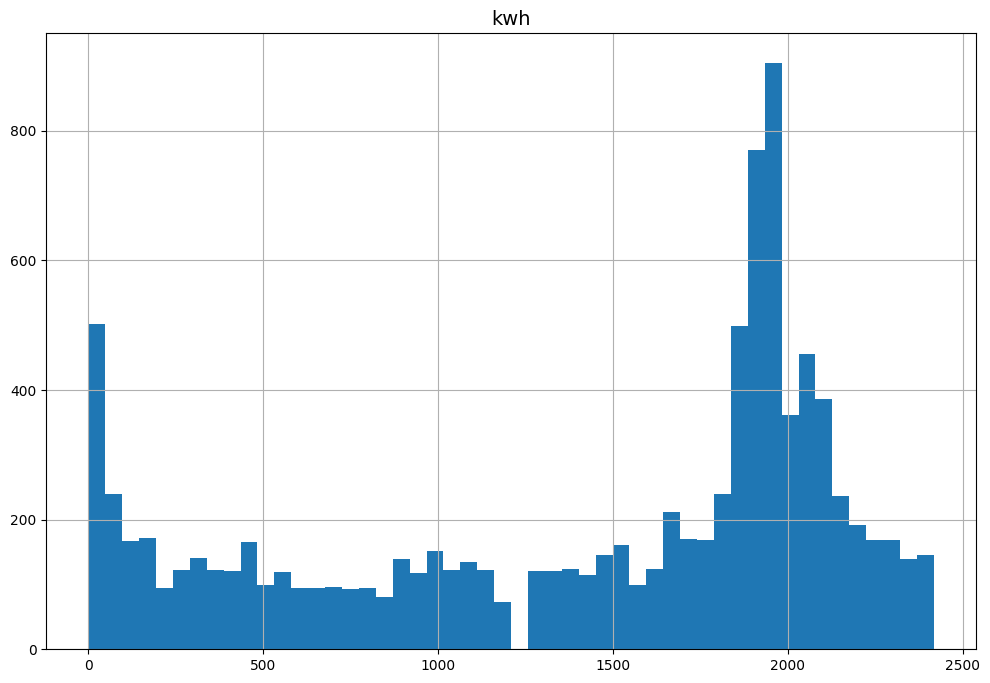

In [62]:
# plot histogram van kwh
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

solar.hist(bins=50, figsize=(12, 8))
plt.show()

In [63]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39840 entries, 0 to 39839
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          39840 non-null  object 
 1   the_geom                     39840 non-null  object 
 2   code                         39840 non-null  int64  
 3   timestamp                    39840 non-null  object 
 4   precip_quantity              6291 non-null   float64
 5   precip_range                 6417 non-null   float64
 6   temp                         39840 non-null  float64
 7   temp_min                     1660 non-null   float64
 8   temp_max                     1657 non-null   float64
 9   temp_grass_min               1189 non-null   float64
 10  wind_speed                   39827 non-null  float64
 11  wind_speed_unit              39840 non-null  int64  
 12  wind_direction               39414 non-null  float64
 13  wind_peak_speed 

In [64]:
weather.describe()

,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
count,39840.000000,6291.000000,6417.000000,39840.000000,1660.000000,1657.000000,1189.000000,39827.000000,39840.0,39414.000000,39815.000000,29880.000000,2802.000000,39828.000000,39840.000000,1245.000000,8.300000e+02,15455.000000
mean,6418.250000,0.965268,1.500078,11.857083,9.035602,15.101509,6.575442,4.887285,1.0,189.530342,8.477408,81.043618,43.602784,1013.377732,1011.530043,322.359036,1.070303e+07,5.490780
std,9.909085,2.478198,0.500039,5.858675,4.943259,6.517190,5.355668,2.688590,0.0,89.520098,4.183079,13.898511,34.207104,11.320142,11.333157,276.246995,7.921183e+06,2.583189
min,6407.000000,0.000000,1.000000,-5.900000,-6.000000,-1.000000,-10.200000,0.000000,1.0,0.100000,0.300000,24.700000,1.000000,965.100000,963.500000,0.000000,4.169000e+05,0.000000
25%,6412.250000,0.000000,1.000000,8.200000,6.000000,10.600000,3.200000,2.959000,1.0,135.900000,5.300000,72.500000,20.000000,1007.200000,1005.300000,54.000000,3.858250e+06,4.000000
50%,6416.000000,0.000000,2.000000,11.200000,9.100000,13.900000,7.000000,4.445000,1.0,206.500000,8.000000,84.200000,46.000000,1014.700000,1012.900000,268.000000,8.987750e+06,7.000000
75%,6422.000000,0.600000,2.000000,15.900000,12.525000,20.200000,10.300000,6.533000,1.0,250.000000,11.000000,92.000000,61.000000,1021.200000,1019.400000,537.000000,1.651740e+07,7.000000
max,6434.000000,43.400000,2.000000,32.400000,23.000000,32.900000,20.500000,21.088000,1.0,360.000000,31.100000,100.000000,162.000000,1041.800000,1040.400000,950.000000,2.943290e+07,8.000000


In [65]:
weather.shape

(39840, 21)

array([[<Axes: title={'center': 'code'}>,
        <Axes: title={'center': 'precip_quantity'}>,
        <Axes: title={'center': 'precip_range'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'temp_min'}>,
        <Axes: title={'center': 'temp_max'}>,
        <Axes: title={'center': 'temp_grass_min'}>,
        <Axes: title={'center': 'wind_speed'}>],
       [<Axes: title={'center': 'wind_speed_unit'}>,
        <Axes: title={'center': 'wind_direction'}>,
        <Axes: title={'center': 'wind_peak_speed'}>,
        <Axes: title={'center': 'humidity_relative'}>],
       [<Axes: title={'center': 'weather_current'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'pressure_station_level'}>,
        <Axes: title={'center': 'sun_duration_24hours'}>],
       [<Axes: title={'center': 'short_wave_from_sky_24hours'}>,
        <Axes: title={'center': 'cloudiness'}>, <Axes: >, <Axes: >]],
      dtype=object)

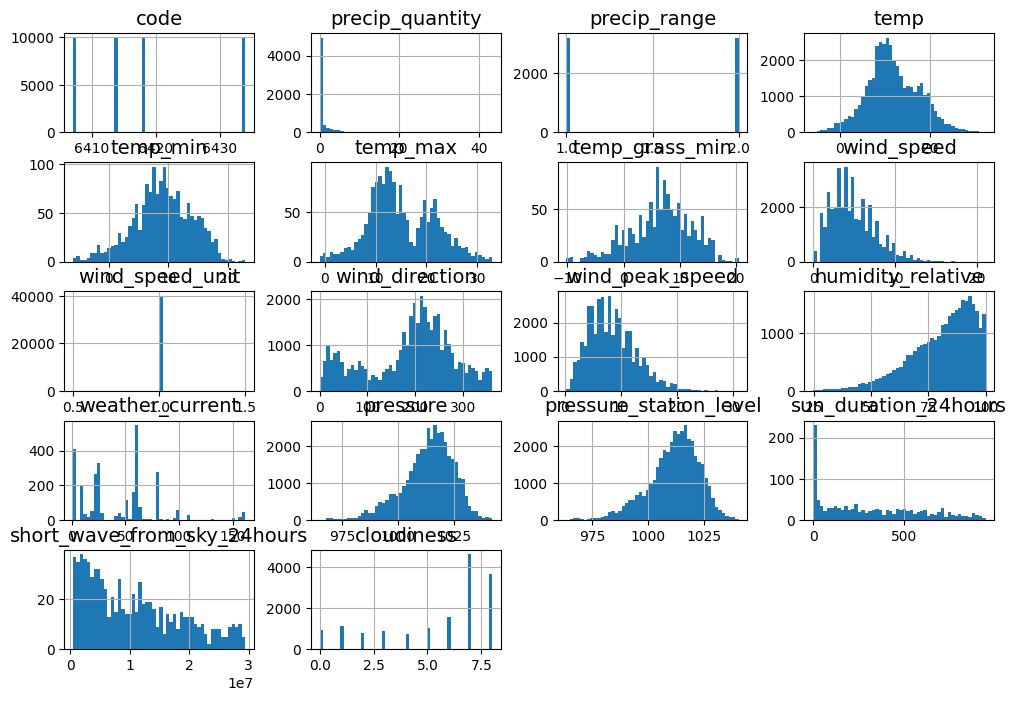

In [66]:
# plot histogrammen van weather
weather.hist(bins=50, figsize=(12, 8))

In [67]:
sunset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datum           731 non-null    datetime64[ns]
 1   Opkomst         731 non-null    object        
 2   Op ware middag  731 non-null    object        
 3   Ondergang       731 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.0+ KB


In [68]:
sunset.describe()

,datum
count,731
mean,2024-01-01 00:00:00
min,2023-01-01 00:00:00
25%,2023-07-02 12:00:00
50%,2024-01-01 00:00:00
75%,2024-07-01 12:00:00
max,2024-12-31 00:00:00


In [69]:
sunset.shape

(731, 4)

# 4. Prepare the data for Machine Learning algorithms

In [70]:
# Omvormen timestamp in solar
solar['timestamp'] = pd.to_datetime(solar['timestamp'], utc=True)
solar['Datum'] = solar['timestamp'].dt.strftime('%Y-%m-%d')
solar["Uur"] = solar['timestamp'].dt.hour

solar = solar.drop(["timestamp"], axis=1)

In [71]:
solar.head(10)

,kwh,Datum,Uur
0,0.54,2023-03-11,15
1,1.02,2023-03-11,16
2,1.17,2023-03-11,17
3,1.18,2023-03-11,18
4,1.18,2023-03-11,19
5,1.18,2023-03-11,20
6,1.18,2023-03-11,21
7,1.18,2023-03-11,22
8,1.18,2023-03-11,23
9,1.18,2023-03-12,0


In [72]:
# Alle waarden van kwh veranderen naar de waarde dat het heeft opgebacht in dat uur
nulwaarde = solar.loc[0, 'kwh']
solar['kwh'] = solar['kwh'].diff()
solar.loc[0, 'kwh'] = nulwaarde

In [73]:
solar.head(10)

,kwh,Datum,Uur
0,0.54,2023-03-11,15
1,0.48,2023-03-11,16
2,0.15,2023-03-11,17
3,0.01,2023-03-11,18
4,0.00,2023-03-11,19
5,0.00,2023-03-11,20
6,0.00,2023-03-11,21
7,0.00,2023-03-11,22
8,0.00,2023-03-11,23
9,0.00,2023-03-12,0


In [74]:
# Het verwijderen van eventuele NaN waarden
solar = solar.dropna()

In [75]:
solar.shape

(9705, 3)

In [76]:
# Verwijder waarden hoger dan 2 en kleiner dan 0 kwh
solar = solar[(solar['kwh'] <= 2) & (solar['kwh'] >= 0)]

In [77]:
solar.shape

(9695, 3)

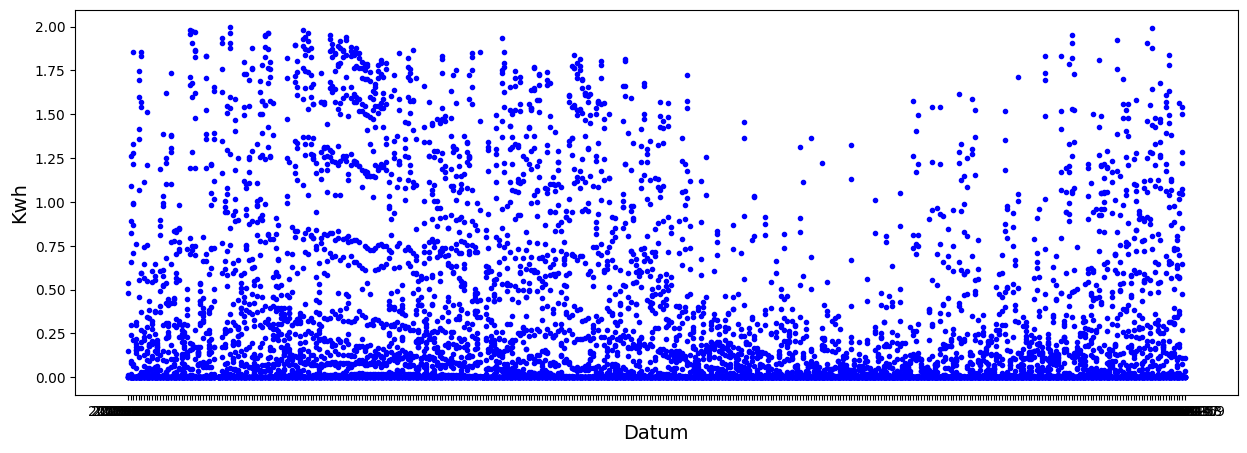

In [78]:
plt.subplots(figsize=(15,5))
plt.plot(solar['Datum'],solar['kwh'],'b.')
plt.xlabel("Datum")
plt.ylabel("Kwh")
plt.show()

In [79]:
weather.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01T09:00:00,NaN,NaN,4.9,NaN,NaN,NaN,...,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01T09:00:00,NaN,NaN,2.1,NaN,NaN,NaN,...,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01T09:00:00,NaN,NaN,3.3,NaN,NaN,NaN,...,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T09:00:00,NaN,NaN,1.6,NaN,NaN,-10.0,...,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T10:00:00,NaN,NaN,3.0,NaN,NaN,NaN,...,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN


In [80]:
# Omvormen timestamp in weather
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather['Datum'] = weather['timestamp'].dt.strftime('%Y-%m-%d')
weather["Uur"] = weather['timestamp'].dt.hour

# Omvoremen van de kolom the_geom, dus de verschillende weerstations naar numerieke waarden
unique_values = weather['the_geom'].unique()
mapping = {value: i+1 for i, value in enumerate(unique_values)}
weather['Weerstation'] = weather['the_geom'].map(mapping)

# Velden verwijderen die ik niet nodig heb
weather = weather.drop(["timestamp", "precip_quantity", "precip_range", "wind_speed", "wind_speed_unit", "wind_direction",
                        "wind_peak_speed", "FID", "the_geom", "temp_min", "temp_max", "temp_grass_min", "sun_duration_24hours",
                        "weather_current", "pressure_station_level", "code", "short_wave_from_sky_24hours"], axis=1)

In [81]:
weather.head()

,temp,humidity_relative,pressure,cloudiness,Datum,Uur,Weerstation
0,4.9,54.3,1029.7,0.0,2023-03-01,9,1
1,2.1,73.7,1029.3,NaN,2023-03-01,9,2
2,3.3,NaN,1029.6,1.0,2023-03-01,9,3
3,1.6,70.9,1029.4,NaN,2023-03-01,9,4
4,3.0,60.8,1028.8,NaN,2023-03-01,10,4


In [82]:
# Het gemiddelde nemen van de weerdata per uur en datum, voor elke 4 weerstations
weather = weather.groupby(['Datum', 'Uur']).agg({
    'humidity_relative': 'mean',
    'cloudiness': 'mean',
    'temp': 'mean',
    'pressure': 'mean'
}).reset_index()

In [83]:
weather.shape

(9960, 6)

In [84]:
weather.head(10)

,Datum,Uur,humidity_relative,cloudiness,temp,pressure
0,2023-03-01,9,66.300000,0.5,2.975,1029.500
1,2023-03-01,10,60.900000,0.5,4.000,1029.150
2,2023-03-01,11,55.000000,0.5,4.800,1028.575
3,2023-03-01,12,53.166667,0.5,5.375,1028.100
4,2023-03-01,13,51.833333,0.5,5.900,1027.125
5,2023-03-01,14,53.400000,0.5,5.950,1026.350
6,2023-03-01,15,55.366667,0.5,5.975,1025.625
7,2023-03-01,16,57.466667,0.5,5.700,1025.075
8,2023-03-01,17,58.866667,0.5,5.300,1024.725
9,2023-03-01,18,58.800000,0.5,4.700,1024.825


In [85]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datum              9960 non-null   object 
 1   Uur                9960 non-null   int32  
 2   humidity_relative  9960 non-null   float64
 3   cloudiness         9960 non-null   float64
 4   temp               9960 non-null   float64
 5   pressure           9960 non-null   float64
dtypes: float64(4), int32(1), object(1)
memory usage: 428.1+ KB


In [86]:
weather.describe()

,Uur,humidity_relative,cloudiness,temp,pressure
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,11.500000,81.043618,5.450502,11.857083,1013.384154
std,6.922534,12.811202,2.408035,5.753937,11.315031
min,0.000000,31.366667,0.000000,-4.650000,967.800000
25%,5.750000,73.266667,3.500000,8.200000,1007.168750
50%,11.500000,84.200000,6.500000,11.237500,1014.700000
75%,17.250000,91.233333,7.500000,15.900000,1021.250000
max,23.000000,99.033333,8.000000,30.975000,1041.275000


In [87]:
weather_solar_merge = pd.merge(weather, solar, on=['Datum', 'Uur'])

In [88]:
weather_solar_merge.head()

,Datum,Uur,humidity_relative,cloudiness,temp,pressure,kwh
0,2023-03-11,15,54.833333,6.0,6.85,1012.025,0.54
1,2023-03-11,16,57.800000,7.0,6.30,1011.625,0.48
2,2023-03-11,17,60.366667,7.0,5.95,1011.500,0.15
3,2023-03-11,18,64.500000,7.0,5.25,1011.850,0.01
4,2023-03-11,19,68.633333,7.0,4.85,1011.650,0.00


In [89]:
weather_solar_merge.shape

(9695, 7)

In [90]:
# Omvormen datum in sunset
sunset['Datum'] = pd.to_datetime(sunset['datum'])
sunset['Datum'] = sunset['datum'].dt.strftime('%Y-%m-%d')

sunset = sunset.drop(["datum"], axis=1)

In [91]:
sunset.head(10)

,Opkomst,Op ware middag,Ondergang,Datum
0,08:45:00,12:46:00,16:47:00,2023-01-01
1,08:45:00,12:46:00,16:48:00,2023-01-02
2,08:45:00,12:47:00,16:49:00,2023-01-03
3,08:44:00,12:47:00,16:51:00,2023-01-04
4,08:44:00,12:48:00,16:52:00,2023-01-05
5,08:44:00,12:48:00,16:53:00,2023-01-06
6,08:43:00,12:49:00,16:54:00,2023-01-07
7,08:43:00,12:49:00,16:56:00,2023-01-08
8,08:43:00,12:50:00,16:57:00,2023-01-09
9,08:42:00,12:50:00,16:58:00,2023-01-10


In [92]:
# Omzetten van datum naar aantal minuten in sunset
sunset['Opkomst'] = pd.to_datetime(sunset['Opkomst'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(sunset['Opkomst'], format='%H:%M:%S').dt.minute
sunset['Op ware middag'] = pd.to_datetime(sunset['Op ware middag'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(sunset['Op ware middag'], format='%H:%M:%S').dt.minute
sunset['Ondergang'] = pd.to_datetime(sunset['Ondergang'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(sunset['Ondergang'], format='%H:%M:%S').dt.minute

In [93]:
sunset.head(10)

,Opkomst,Op ware middag,Ondergang,Datum
0,525,766,1007,2023-01-01
1,525,766,1008,2023-01-02
2,525,767,1009,2023-01-03
3,524,767,1011,2023-01-04
4,524,768,1012,2023-01-05
5,524,768,1013,2023-01-06
6,523,769,1014,2023-01-07
7,523,769,1016,2023-01-08
8,523,770,1017,2023-01-09
9,522,770,1018,2023-01-10


In [94]:
# Mergen weather en sunset
df = weather_solar_merge.merge(sunset, on='Datum', how='left')

In [95]:
df.head(10)

,Datum,Uur,humidity_relative,cloudiness,temp,pressure,kwh,Opkomst,Op ware middag,Ondergang
0,2023-03-11,15,54.833333,6.0,6.850,1012.025,0.54,426,773,1120
1,2023-03-11,16,57.800000,7.0,6.300,1011.625,0.48,426,773,1120
2,2023-03-11,17,60.366667,7.0,5.950,1011.500,0.15,426,773,1120
3,2023-03-11,18,64.500000,7.0,5.250,1011.850,0.01,426,773,1120
4,2023-03-11,19,68.633333,7.0,4.850,1011.650,0.00,426,773,1120
5,2023-03-11,20,68.400000,7.0,4.900,1011.700,0.00,426,773,1120
6,2023-03-11,21,69.600000,7.0,4.700,1011.525,0.00,426,773,1120
7,2023-03-11,22,70.133333,8.0,4.825,1011.325,0.00,426,773,1120
8,2023-03-11,23,70.400000,8.0,4.700,1010.750,0.00,426,773,1120
9,2023-03-12,0,75.166667,7.0,4.525,1010.250,0.00,424,772,1122


In [96]:
# Omzetten naar csv bestand
df.to_csv('datasets/df.csv', index=False)

In [97]:
df.shape

(9695, 10)

In [98]:
df.head(10)

,Datum,Uur,humidity_relative,cloudiness,temp,pressure,kwh,Opkomst,Op ware middag,Ondergang
0,2023-03-11,15,54.833333,6.0,6.850,1012.025,0.54,426,773,1120
1,2023-03-11,16,57.800000,7.0,6.300,1011.625,0.48,426,773,1120
2,2023-03-11,17,60.366667,7.0,5.950,1011.500,0.15,426,773,1120
3,2023-03-11,18,64.500000,7.0,5.250,1011.850,0.01,426,773,1120
4,2023-03-11,19,68.633333,7.0,4.850,1011.650,0.00,426,773,1120
5,2023-03-11,20,68.400000,7.0,4.900,1011.700,0.00,426,773,1120
6,2023-03-11,21,69.600000,7.0,4.700,1011.525,0.00,426,773,1120
7,2023-03-11,22,70.133333,8.0,4.825,1011.325,0.00,426,773,1120
8,2023-03-11,23,70.400000,8.0,4.700,1010.750,0.00,426,773,1120
9,2023-03-12,0,75.166667,7.0,4.525,1010.250,0.00,424,772,1122


# 5. Select a model and train it

In [99]:
# Data inladen en voorbereiden
X = df[['Uur', 'humidity_relative', 'cloudiness', 'temp', 'pressure', 'Opkomst', 'Ondergang']]
y = df['kwh']

In [100]:
from sklearn.model_selection import train_test_split

# Split data in training en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Shapes van de train en test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7756, 7), (1939, 7), (7756,), (1939,))

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Model opzetten en trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen maken
y_pred = model.predict(X_test)

# Model evalueren
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.23478715764169017


In [103]:
# Voorspellingen voor de eerste 20 rijen maken
X_new = df.head(20)[['Uur', 'humidity_relative', 'cloudiness', 'temp', 'pressure', 'Opkomst', 'Ondergang']]
y_new_predictions = model.predict(X_new)

# Resultaten printen
print("\nVoorspellingen:")
for i, (prediction, date, hour) in enumerate(zip(y_new_predictions, df['Datum'], df['Uur']), 1):
        print(f"Voorspeld kwh voor {date} om {hour} uur: {prediction:.2f} kWh")


Voorspellingen:
Voorspeld kwh voor 2023-03-11 om 15 uur: 0.67 kWh
Voorspeld kwh voor 2023-03-11 om 16 uur: 0.59 kWh
Voorspeld kwh voor 2023-03-11 om 17 uur: 0.53 kWh
Voorspeld kwh voor 2023-03-11 om 18 uur: 0.44 kWh
Voorspeld kwh voor 2023-03-11 om 19 uur: 0.35 kWh
Voorspeld kwh voor 2023-03-11 om 20 uur: 0.35 kWh
Voorspeld kwh voor 2023-03-11 om 21 uur: 0.32 kWh
Voorspeld kwh voor 2023-03-11 om 22 uur: 0.30 kWh
Voorspeld kwh voor 2023-03-11 om 23 uur: 0.29 kWh
Voorspeld kwh voor 2023-03-12 om 0 uur: 0.29 kWh
Voorspeld kwh voor 2023-03-12 om 1 uur: 0.17 kWh
Voorspeld kwh voor 2023-03-12 om 2 uur: 0.13 kWh
Voorspeld kwh voor 2023-03-12 om 3 uur: 0.05 kWh
Voorspeld kwh voor 2023-03-12 om 4 uur: -0.06 kWh
Voorspeld kwh voor 2023-03-12 om 5 uur: -0.12 kWh
Voorspeld kwh voor 2023-03-12 om 6 uur: -0.14 kWh
Voorspeld kwh voor 2023-03-12 om 7 uur: -0.10 kWh
Voorspeld kwh voor 2023-03-12 om 8 uur: -0.05 kWh
Voorspeld kwh voor 2023-03-12 om 9 uur: 0.04 kWh
Voorspeld kwh voor 2023-03-12 om 10 uu

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Grid search parameters
param_grid = [
    {
        'n_estimators': [180, 190, 200], 
        'max_depth': [20, 30, 40],
    }
 ]

# model opzetten
forest_reg = RandomForestRegressor(random_state=42)

# Grid search uitvoeren
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_mean_absolute_error')

# Model trainen     
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [20, 30, 40],
                          'n_estimators': [180, 190, 200]}],
             scoring='neg_mean_absolute_error')

In [105]:
# Beste parameters printen
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 180}

In [106]:
from sklearn.metrics import mean_absolute_error

# Beste model selecteren
final_model = grid_search.best_estimator_

# Voorspellingen maken met het beste model
final_predictions = final_model.predict(X_test)

# Mean absolute error berekenen
final_mae = mean_absolute_error(y_test, final_predictions)
final_mae

0.05691703416087582

In [107]:
import pickle

# Define the file name to be created in the current directory
bestand_pad = "best_model.pkl"

# Save the model to the .pkl file
with open(bestand_pad, 'wb') as f:
    pickle.dump(final_model, f)


In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Grid search parameters
param_grid = [
    {
        'max_depth': [6, 8, 10, 12],
        'min_samples_split': [1 ,2, 4, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6]
    }
]

# Model opzetten
tree_reg = DecisionTreeRegressor(random_state=42)

# Grid search uitvoeren
grid_search = GridSearchCV(tree_reg, param_grid, cv=3, scoring='neg_mean_absolute_error')

# Model trainen      
grid_search.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [6, 8, 10, 12],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                          'min_samples_split': [1, 2, 4, 5, 10]}],
             scoring='neg_mean_absolute_error')

In [109]:
# Beste parameters printen
grid_search.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [110]:
from sklearn.metrics import mean_absolute_error

# Beste model selecteren
final_model = grid_search.best_estimator_

# Voorspellingen maken met het beste model
final_predictions = final_model.predict(X_test)

# Mean absolute error berekenen
final_mae = mean_absolute_error(y_test, final_predictions)
final_mae

0.07213319783843392

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR

# Maak een pipeline met een StandardScaler en een LinearSVC
pipeline = make_pipeline(StandardScaler(), LinearSVR(random_state=42))

# Definieer het parameter grid voor GridSearchCV
param_grid = {
    'linearsvr__C': [0.01, 0.1, 1, 10, 100],
    'linearsvr__max_iter': [1000, 2000, 3000],
    'linearsvr__tol': [1e-4, 1e-3, 1e-2]
}

# Maak een GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error')

# Train het model met GridSearchCV
grid_search.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will c

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearsvr',
                                        LinearSVR(random_state=42))]),
             param_grid={'linearsvr__C': [0.01, 0.1, 1, 10, 100],
                         'linearsvr__max_iter': [1000, 2000, 3000],
                         'linearsvr__tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_absolute_error')

In [112]:
# Beste parameters printen
grid_search.best_params_

{'linearsvr__C': 0.01, 'linearsvr__max_iter': 1000, 'linearsvr__tol': 0.0001}

In [113]:
from sklearn.metrics import mean_absolute_error

# Beste model selecteren
final_model = grid_search.best_estimator_

# Voorspellingen maken met het beste model
final_predictions = final_model.predict(X_test)

# Mean absolute error berekenen
final_mae = mean_absolute_error(y_test, final_predictions)
final_mae

0.21882401177853775